# Loading Libraries and Data

In [163]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [121]:
# Importing Seaborn Library for data visualisation
import seaborn as sns

In [122]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [123]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
df['Outcome'] = np.where(df['Outcome']==1,"Diabetic", "Non-Diabetic")


In [125]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [126]:
sns.pairplot(df, hue="Outcome")

In [127]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
X  = df.drop('Outcome',axis=1).values   #.values to convert pandas df to numpy array
y = df['Outcome'].values

In [129]:

X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [130]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [131]:
# COnverting into Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [132]:
X_train.shape

torch.Size([614, 8])

In [133]:
# Creating Model


class ANN_Model(nn.Module):
    def __init__(self,input_feature=8,h1=20,h2=20,output_feature=2):
        super().__init__()
        self.fc1 = nn.Linear(input_feature,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,output_feature)


    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x 

In [134]:
# Instantiate model:
torch.manual_seed(20)
model = ANN_Model()

In [135]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [136]:
# Defining loss and optimisers:

loss_function = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [137]:
# Running Model:


epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    losses.append(loss.detach().numpy())
    
    if i%50==0:
        print(f"Epoch: {i} , Loss: {loss.item()}")
    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
        

Epoch: 0 , Loss: 3.4572105407714844
Epoch: 50 , Loss: 0.5529041886329651
Epoch: 100 , Loss: 0.5061253905296326
Epoch: 150 , Loss: 0.4799235463142395
Epoch: 200 , Loss: 0.44577309489250183


Epoch: 250 , Loss: 0.4251139760017395
Epoch: 300 , Loss: 0.4068220555782318
Epoch: 350 , Loss: 0.39124682545661926
Epoch: 400 , Loss: 0.3763653635978699
Epoch: 450 , Loss: 0.36230602860450745
Epoch: 500 , Loss: 0.372440904378891
Epoch: 550 , Loss: 0.3360230326652527
Epoch: 600 , Loss: 0.3430291712284088
Epoch: 650 , Loss: 0.3356098234653473
Epoch: 700 , Loss: 0.3121124804019928
Epoch: 750 , Loss: 0.3947701156139374
Epoch: 800 , Loss: 0.3076119124889374
Epoch: 850 , Loss: 0.31885895133018494
Epoch: 900 , Loss: 0.321596622467041
Epoch: 950 , Loss: 0.2933118939399719


Text(0.5, 0, 'Epochs')

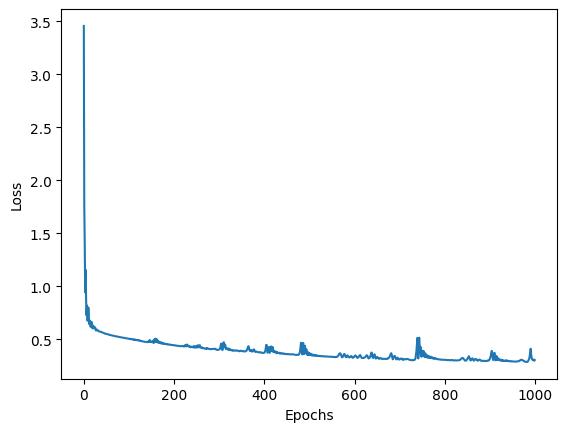

In [138]:
# Plotting the loss function:
plt.plot(range(epochs),losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [154]:
# Doing Actual Predictions: Checking on test data

predictions = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
    

In [158]:
cm = confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [18, 29]])

Text(95.72222222222221, 0.5, 'Predictions')

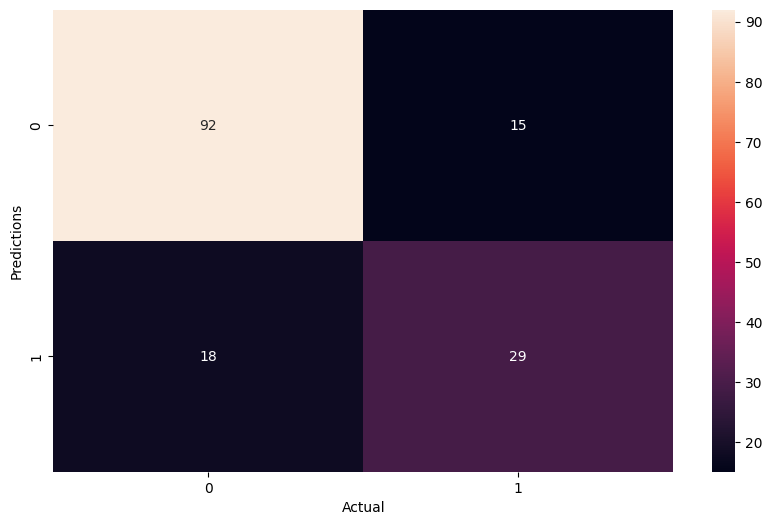

In [161]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predictions")

In [164]:
# Checking Accuracy
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7857142857142857

In [165]:
# Save the Model:
torch.save(model,'diabetes.pt')

In [166]:
model = torch.load("diabetes.pt")

In [168]:
model.eval()

ANN_Model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [170]:
# PREDICTION OF NEW DATA POINTS:
list1 = list(df.iloc[0,:-1])
list1

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [172]:
list1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [173]:
new_data = torch.tensor(list1)

In [174]:
# Checking on Real Data
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())
        

tensor([0.5515, 2.1941])
1
